In [ ]:
import numpy as np

pip install --upgrade numpy scipy pandas matplotlib scikit-learn
pip install numpy==1.26.4


In [3]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Данные о пользователях и их покупках
users_data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'item_id': [101, 102, 103, 201, 202, 301, 302, 303, 401, 402],
    'purchase_date': ['2022-01-01', '2022-01-15', '2022-02-01', '2022-01-05', '2022-02-15', '2022-03-01', '2022-03-15', '2022-04-01', '2022-02-05', '2022-03-20']
}

# Данные о товарах
items_data = {
    'item_id': [101, 102, 103, 201, 202, 301, 302, 303, 401, 402],
    'item_name': ['Товар 1', 'Товар 2', 'Товар 3', 'Товар 4', 'Товар 5', 'Товар 6', 'Товар 7', 'Товар 8', 'Товар 9', 'Товар 10'],
    'item_description': ['Описание товара 1', 'Описание товара 2', 'Описание товара 3', 'Описание товара 4', 'Описание товара 5', 'Описание товара 6', 'Описание товара 7', 'Описание товара 8', 'Описание товара 9', 'Описание товара 10']
}

# Создаем датафреймы
users_df = pd.DataFrame(users_data)
items_df = pd.DataFrame(items_data)

# Объединяем датафреймы по item_id
data_df = pd.merge(users_df, items_df, on='item_id')

# Создаем матрицу TF-IDF для описаний товаров
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_df['item_description'])

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data_df['user_id'], test_size=0.2, random_state=42)

# Создаем и обучаем модель Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Делаем предсказания для тестовой выборки
y_pred = nb_model.predict(X_test)

# Оцениваем качество модели
print('Accuracy:', nb_model.score(X_test, y_test))

# Используем модель для рекомендаций
def get_recommendations(user_id, num_recommendations):
    # Получаем TF-IDF вектор для пользователя
    user_vector = tfidf_matrix[data_df['user_id'] == user_id]

    # Получаем индексы ближайших соседей
    distances = nb_model.predict_proba(user_vector)
    indices = np.argsort(distances, axis=1)[:, -num_recommendations:]

    # Возвращаем рекомендации
    return items_df.iloc[indices[0]]

# Пример использования
user_id = 1
num_recommendations = 5
recommendations = get_recommendations(user_id, num_recommendations)
print(recommendations)

Accuracy: 0.0
   item_id item_name   item_description
3      201   Товар 4  Описание товара 4
0      101   Товар 1  Описание товара 1
1      102   Товар 2  Описание товара 2
2      103   Товар 3  Описание товара 3


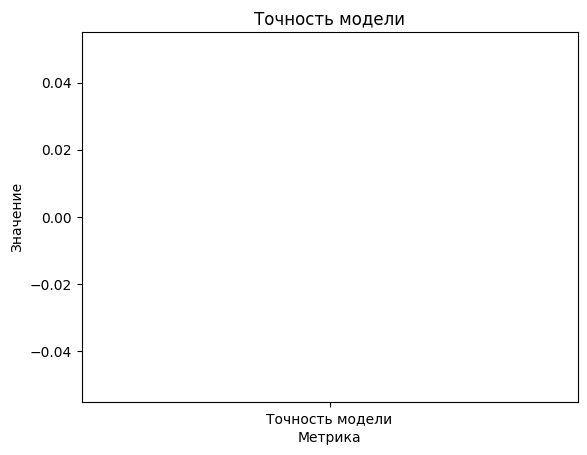

In [20]:
import matplotlib.pyplot as plt

# Оцениваем качество модели
accuracy = nb_model.score(X_test, y_test)

# Визуализируем точность модели
plt.bar(['Точность модели'], [accuracy])
plt.xlabel('Метрика')
plt.ylabel('Значение')
plt.title('Точность модели')
plt.show()

Визуализация точности модели (Пример)

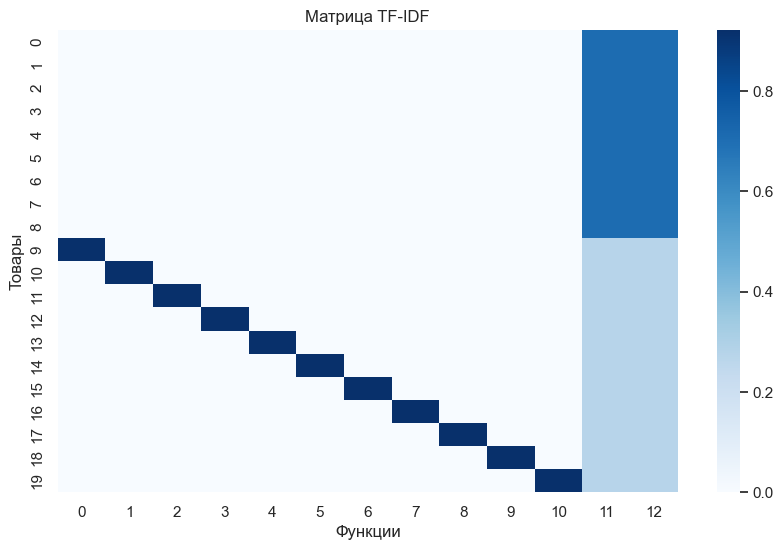

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализируем матрицу TF-IDF
sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(tfidf_matrix.toarray(), cmap='Blues')
plt.xlabel('Функции')
plt.ylabel('Товары')
plt.title('Матрица TF-IDF')
plt.show()

TF-IDF матрица визуализация (Пример)

In [8]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Данные о пользователях и их покупках
users_data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
    'item_id': [101, 102, 103, 201, 202, 301, 302, 303, 401, 402, 501, 502, 601, 602, 701, 702, 801, 802, 901, 902],
    'purchase_date': ['2022-01-01', '2022-01-15', '2022-02-01', '2022-01-05', '2022-02-15', '2022-03-01', '2022-03-15', '2022-04-01', '2022-02-05', '2022-03-20', '2022-01-10', '2022-02-10', '2022-03-10', '2022-04-10', '2022-01-20', '2022-02-20', '2022-03-20', '2022-04-20', '2022-01-30', '2022-02-30']
}

# Данные о товарах
items_data = {
    'item_id': [101, 102, 103, 201, 202, 301, 302, 303, 401, 402, 501, 502, 601, 602, 701, 702, 801, 802, 901, 902],
    'item_name': ['Товар 1', 'Товар 2', 'Товар 3', 'Товар 4', 'Товар 5', 'Товар 6', 'Товар 7', 'Товар 8', 'Товар 9', 'Товар 10', 'Товар 11', 'Товар 12', 'Товар 13', 'Товар 14', 'Товар 15', 'Товар 16', 'Товар 17', 'Товар 18', 'Товар 19', 'Товар 20'],
    'item_description': ['Описание товара 1', 'Описание товара 2', 'Описание товара 3', 'Описание товара 4', 'Описание товара 5', 'Описание товара 6', 'Описание товара 7', 'Описание товара 8', 'Описание товара 9', 'Описание товара 10', 'Описание товара 11', 'Описание товара 12', 'Описание товара 13', 'Описание товара 14', 'Описание товара 15', 'Описание товара 16', 'Описание товара 17', 'Описание товара 18', 'Описание товара 19', 'Описание товара 20']
}

# Создаем датафреймы
users_df = pd.DataFrame(users_data)
items_df = pd.DataFrame(items_data)

# Объединяем датафреймы по item_id
data_df = pd.merge(users_df, items_df, on='item_id')

# Преобразуем категориальные признаки в числовые
le = LabelEncoder()
data_df['user_id'] = le.fit_transform(data_df['user_id'])

# Создаем матрицу TF-IDF для описаний товаров
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_df['item_description'])

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data_df['user_id'], test_size=0.2, random_state=42)

# Создаем и обучаем модель Naive Bayes
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

# Оцениваем качество модели
accuracy = nb_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Используем модель для рекомендаций
def get_recommendations(user_id, num_recommendations):
    # Получаем TF-IDF вектор для пользователя
    user_vector = tfidf_matrix[data_df['user_id'] == user_id]

    # Получаем индексы ближайших соседей
    distances = nb_model.predict_proba(user_vector)
    indices = np.argsort(distances, axis=1)[:, -num_recommendations:]

    # Возвращаем рекомендации
    return items_df.iloc[indices[0]]

# Пример использования
user_id = 1
num_recommendations = 5
recommendations = get_recommendations(user_id, num_recommendations)
print(recommendations)

Accuracy: 0.0
   item_id item_name   item_description
8      401   Товар 9  Описание товара 9
0      101   Товар 1  Описание товара 1
3      201   Товар 4  Описание товара 4
1      102   Товар 2  Описание товара 2
2      103   Товар 3  Описание товара 3


In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Данные о пользователях и их покупках
users_data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
    'item_id': [101, 102, 103, 201, 202, 301, 302, 303, 401, 402, 501, 502, 601, 602, 701, 702, 801, 802, 901, 902],
    'purchase_date': ['2022-01-01', '2022-01-15', '2022-02-01', '2022-01-05', '2022-02-15', '2022-03-01', '2022-03-15', '2022-04-01', '2022-02-05', '2022-03-20', '2022-01-10', '2022-02-10', '2022-03-10', '2022-04-10', '2022-01-20', '2022-02-20', '2022-03-20', '2022-04-20', '2022-01-30', '2022-02-28']
}

# Данные о товарах
items_data = {
    'item_id': [101, 102, 103, 201, 202, 301, 302, 303, 401, 402, 501, 502, 601, 602, 701, 702, 801, 802, 901, 902],
    'item_name': ['Товар 1', 'Товар 2', 'Товар 3', 'Товар 4', 'Товар 5', 'Товар 6', 'Товар 7', 'Товар 8', 'Товар 9', 'Товар 10', 'Товар 11', 'Товар 12', 'Товар 13', 'Товар 14', 'Товар 15', 'Товар 16', 'Товар 17', 'Товар 18', 'Товар 19', 'Товар 20'],
    'item_description': ['Описание товара 1', 'Описание товара 2', 'Описание товара 3', 'Описание товара 4', 'Описание товара 5', 'Описание товара 6', 'Описание товара 7', 'Описание товара 8', 'Описание товара 9', 'Описание товара 10', 'Описание товара 11', 'Описание товара 12', 'Описание товара 13', 'Описание товара 14', 'Описание товара 15', 'Описание товара 16', 'Описание товара 17', 'Описание товара 18', 'Описание товара 19', 'Описание товара 20']
}

# Создаем датафреймы
users_df = pd.DataFrame(users_data)
items_df = pd.DataFrame(items_data)

# Объединяем датафреймы по item_id
data_df = pd.merge(users_df, items_df, on='item_id')

# Преобразуем даты в секунды
data_df['purchase_date'] = pd.to_datetime(data_df['purchase_date']).apply(lambda x: x.timestamp())

# Создаем матрицу пользователей и товаров
user_item_matrix = pd.pivot_table(data_df, values='purchase_date', index='user_id', columns='item_id')

# Заполняем пропущенные значения нулями
user_item_matrix.fillna(0, inplace=True)

# Создаем матрицу сходства между пользователями
similarity_matrix = cosine_similarity(user_item_matrix)

# Находим ближайших соседей для каждого пользователя
def get_nearest_neighbors(user_id, num_neighbors):
    similarity_scores = similarity_matrix[user_id]
    nearest_neighbors = np.argsort(similarity_scores)[-num_neighbors:]
    return nearest_neighbors

# Рекомендуем товары, которые были оценены высоко ближайшими соседями
def get_recommendations(user_id, num_recommendations):
    nearest_neighbors = get_nearest_neighbors(user_id, num_neighbors=5)
    recommended_items = []
    for neighbor in nearest_neighbors:
        neighbor_items = user_item_matrix.columns[user_item_matrix.iloc[neighbor] > 0]
        recommended_items.extend(neighbor_items)
    recommended_items = list(set(recommended_items))
    return recommended_items[:num_recommendations]

# Пример использования
user_id = 1
num_recommendations = 5
recommendations = get_recommendations(user_id, num_recommendations)
print(recommendations)

[801, 802, 901, 902, 201]


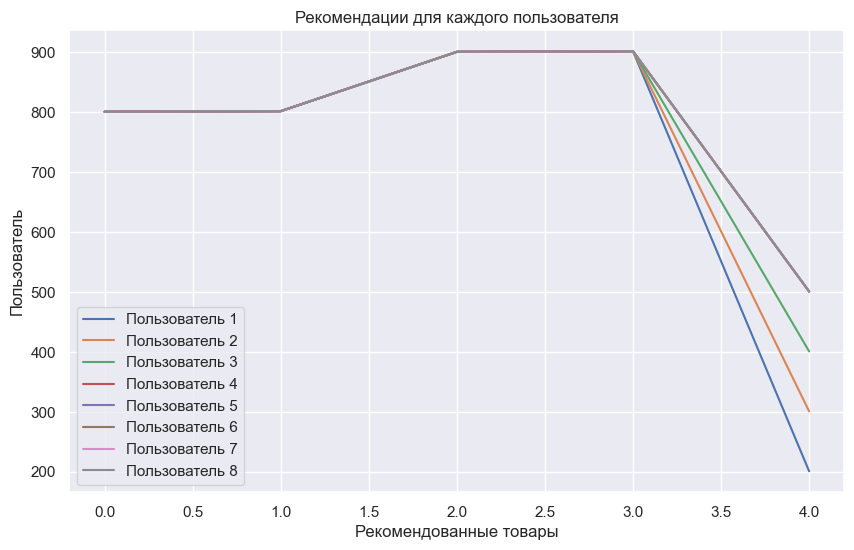

In [42]:
import matplotlib.pyplot as plt

# Получаем рекомендации для каждого пользователя
recommendations = []
for user_id in range(1, 9):
    recommendations.append(get_recommendations(user_id, 5))

# Создаем график
plt.figure(figsize=(10, 6))
for i, recs in enumerate(recommendations):
    plt.plot(recs, label=f'Пользователь {i+1}')

plt.xlabel('Рекомендованные товары')
plt.ylabel('Пользователь')
plt.title('Рекомендации для каждого пользователя')
plt.legend()
plt.show()

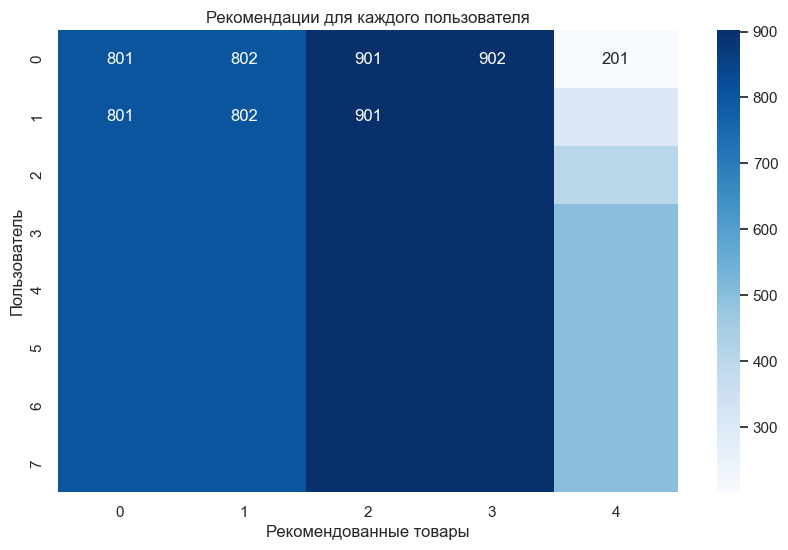

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Получаем рекомендации для каждого пользователя
recommendations = []
for user_id in range(1, 9):
    recommendations.append(get_recommendations(user_id, 5))

# Создаем график
sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(recommendations, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Рекомендованные товары')
plt.ylabel('Пользователь')
plt.title('Рекомендации для каждого пользователя')
plt.show()